In [54]:
%matplotlib inline
from sklearn.cluster import AffinityPropagation, KMeans, DBSCAN, SpectralClustering
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X = (X - X.mean(axis=0)) / X.std(axis=0)



In [11]:
ap = AffinityPropagation()
ap_cluster_labels = ap.fit_predict(X)  # gets the cluster labels.
ap_cluster_labels[0:5]

array([4, 0, 2, 4, 1])

In [12]:
# Use multi-dimensional scaling (MDS) to get a 2-D plane representation of the data, so that we can plot it.
mds = MDS()
mds_coords = mds.fit_transform(X)

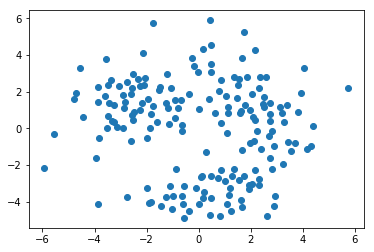

In [13]:
plt.scatter(mds_coords[:,0], mds_coords[:,1])

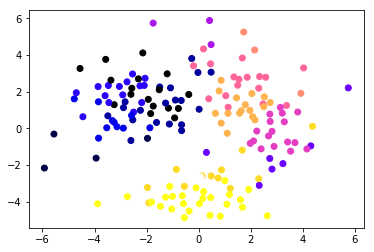

In [14]:
# Colour the clusters by cluster number, then plot on MDS plot.
cmap = plt.cm.get_cmap('gnuplot2', len(ap_cluster_labels))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=ap_cluster_labels, cmap=cmap)

In [16]:
silhouette_score(X, ap_cluster_labels)

0.12094943296335095

In [26]:
km = KMeans(n_clusters=5)
km_cluster_labels = km.fit_predict(X)
km_cluster_labels[0:5]

array([1, 1, 1, 1, 4], dtype=int32)

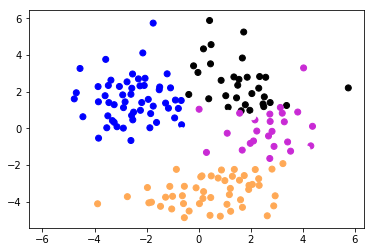

In [27]:
cmap = plt.cm.get_cmap('gnuplot2', len(km_cluster_labels))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=km_cluster_labels, cmap=cmap)

In [35]:
silhouette_score(X, km_cluster_labels)

0.23476387776939125

In [43]:
dbs = DBSCAN()
dbs_cluster_labels = dbs.fit_predict(X)
dbs_cluster_labels[0:5]

array([-1, -1, -1, -1, -1])

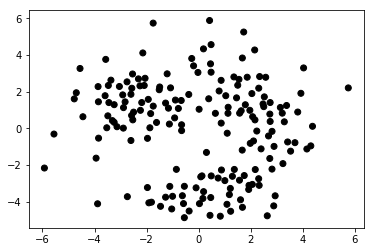

In [44]:
cmap = plt.cm.get_cmap('gnuplot2', len(dbs_cluster_labels))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=dbs_cluster_labels, cmap=cmap)

In [45]:
# What are the silhouette scores for each of the 3 algorithms?
silhouette_score(X, dbs_cluster_labels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [47]:
spc = SpectralClustering()
spc_cluster_labels = spc.fit_predict(X)
spc_cluster_labels[0:5]

array([0, 5, 5, 5, 5], dtype=int32)

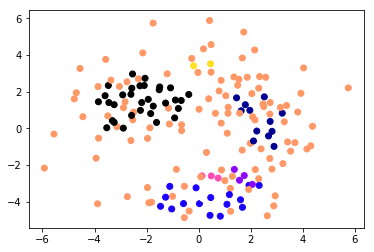

In [48]:
cmap = plt.cm.get_cmap('gnuplot2', len(spc_cluster_labels))

plt.scatter(mds_coords[:,0], mds_coords[:,1], c=spc_cluster_labels, cmap=cmap)

In [49]:
silhouette_score(X, spc_cluster_labels)

-0.11590011647908852

In [55]:
TS = TSNE()
TS_coords = TS.fit_transform(X)

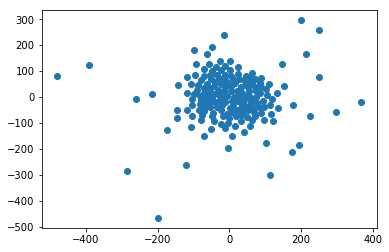

In [56]:
plt.scatter(TS_coords[:,0], TS_coords[:,1])

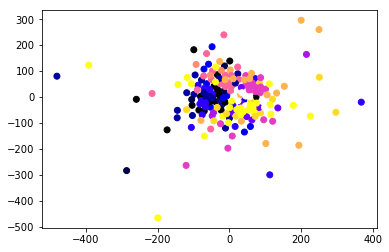

In [57]:
cmap = plt.cm.get_cmap('gnuplot2', len(ap_cluster_labels))

plt.scatter(TS_coords[:,0], TS_coords[:,1], c=ap_cluster_labels, cmap=cmap)

In [58]:
ISO = Isomap()
ISO_coords = ISO.fit_transform(X)

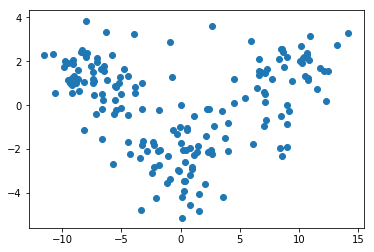

In [59]:
plt.scatter(ISO_coords[:,0], ISO_coords[:,1])

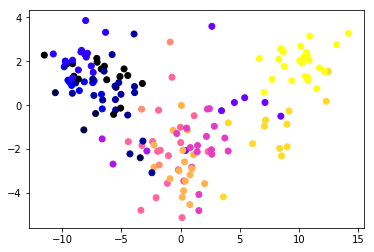

In [60]:
cmap = plt.cm.get_cmap('gnuplot2', len(ap_cluster_labels))

plt.scatter(ISO_coords[:,0], ISO_coords[:,1], c=ap_cluster_labels, cmap=cmap)